In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier


In [2]:
from sklearn.datasets import fetch_openml

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import numpy as np
np.sqrt(len(X[0]))

28.0

$$28\ x\ 28\ px$$

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# let's see 11111th image in our dataset

(-0.5, 27.5, 27.5, -0.5)

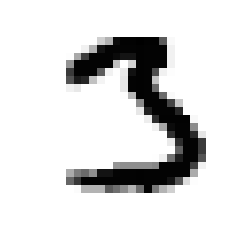

In [8]:
plt.imshow(X[11111].reshape(28, 28), cmap = 'Greys', interpolation="nearest")
plt.axis('off')

In [9]:
y[11111]

'3'

In [25]:
# Lets peek in on more data 
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'Greys', **options)
    plt.axis("off")

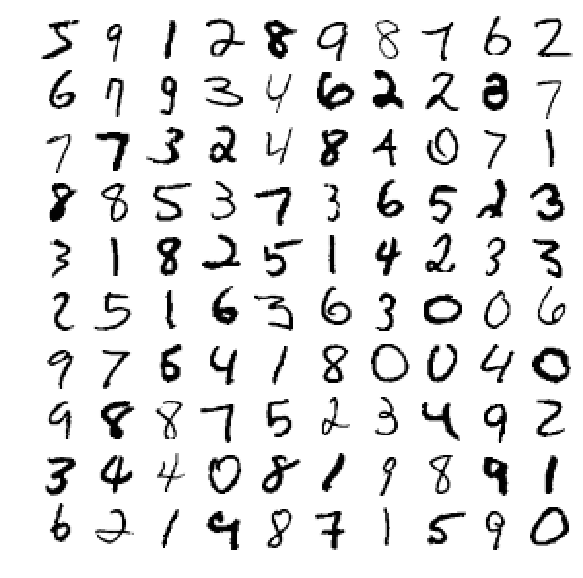

In [29]:
plt.figure(figsize=(10, 10))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)

# EDA

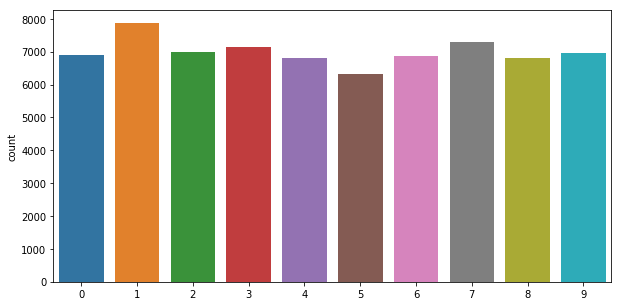

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(y)

**All digit got almost the same counts**

In [40]:
np.sum(np.isnan(X.flatten()))

0

# Multiclass Classification Using Stochastic GD

In [41]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Shuffling the training Data

In [42]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [45]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42) # Default values

In [46]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
some_digit = X[11111]

In [48]:
some_digit.shape

(784,)

In [50]:
sgd_clf.predict([some_digit]) # passing as 1-D array to add dimension (1, 784)

array(['3'], dtype='<U1')

In [51]:
# check the true label
y[11111]

'3'

In [54]:
### predicting sofmax score for every digit
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -517826.58795042,  -623644.31143195,   -98641.80189547,
          167386.09381437, -1014824.00341377,  -478223.90911851,
        -1007992.8789182 ,  -666893.50076478,  -572902.40944267,
        -1095859.5216502 ]])

**167386.09381437 ----> belongs to digit 3**

In [55]:
np.argmax(some_digit_scores) # return index with maximum value

3

In [56]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [60]:
X

array(['8', '4', '4', ..., '1', '1', '0'], dtype=object)

In [64]:
y_pred = sgd_clf.predict(X_test)

In [62]:
y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

# column wise comparison

In [71]:
import pandas as pd
df = pd.DataFrame({'predictions':y_pred, 'actual label':y_test})

In [72]:
df.head()

,predictions,actual label
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [73]:
df[df.predictions != df['actual label']] # wrong predictions

,predictions,actual label
8,4,5
15,3,5
16,4,9
33,6,4
38,3,2
55,8,0
62,4,9
63,2,3
66,2,6
118,4,9


In [80]:
#accuracy on test set
sgd_acc = round((df[df.predictions == df['actual label']] .shape[0]/df.shape[0])*100, 2)
sgd_acc

88.07

# Confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 895,    0,   10,    7,    6,    4,    8,   10,   39,    1],
       [   0, 1046,    3,    2,    0,    3,    3,    2,   74,    2],
       [   0,    4,  932,   10,    4,    0,    8,   10,   60,    4],
       [   0,    0,   41,  894,    0,   23,    0,    9,   31,   12],
       [   0,    0,   12,    3,  887,    1,    6,    4,   33,   36],
       [   7,    3,   13,   88,   17,  687,    7,    8,   53,    9],
       [   6,    3,   21,    1,    8,   24,  872,    0,   23,    0],
       [   0,    4,   30,    5,    8,    2,    1,  929,   14,   35],
       [   7,    2,   10,   24,   23,   20,    6,   18,  846,   18],
       [   1,    6,    3,   21,   97,    2,    1,   29,   30,  819]])

# One Vs One Classification

In [81]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array(['3'], dtype=object)

In [82]:
y_pred = ovo_clf.predict(X_test)

In [84]:
import pandas as pd
df = pd.DataFrame({'predictions':y_pred, 'actual label':y_test})
#accuracy on test set
ovo_acc = round((df[df.predictions == df['actual label']] .shape[0]/df.shape[0])*100, 2)
ovo_acc

91.78

**Wow we got 91% accuracy in test set using OvO**

In [86]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87862428, 0.86644332, 0.87158074])

In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.90941812, 0.91079554, 0.91528729])

**In cross-val also we can see OvO is better**
# Using Multilabel Classification

In [92]:
y_train

array([8, 4, 4, ..., 1, 1, 0])

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [99]:
y_knn_pred = knn_clf.predict(X_test)

In [100]:
y_knn_pred

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [101]:
import pandas as pd
df = pd.DataFrame({'predictions':y_knn_pred, 'actual label':y_test})

#accuracy on test set
sgd_acc = round((df[df.predictions == df['actual label']] .shape[0]/df.shape[0])*100, 2)
sgd_acc

97.14

**Woaaah 97% accuracy on test set** 

# Data Augmentation

In [103]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [104]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [106]:
X_train_augmented.shape

(300000, 784)

### Takes too long to train because of 3 Lakhs images

In [108]:
shuffle_idx = np.random.permutation(len(X_train_augmented))

In [111]:
len(X_train_augmented)

300000

In [109]:
X_train_augmented = X_train_augmented[shuffle_idx]

MemoryError: 

In [ ]:
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train_augmented, y_train_augmented)

# Deep Neural network with 2 2D Convolution layers, 32 filters, and maxpooling used Dropout to reduce overfitting, optimizer = RMSProp

# Load data

In [ ]:
# Load the data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

# Load utility functions from keras (Using tensorflow backend)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Normalization

In [2]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

# Reshape

In [3]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Label encoding

In [5]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

ModuleNotFoundError: No module named 'keras'

In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

In [ ]:
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Set the optimizer and annealer

In [ ]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
epochs = 30 
batch_size = 86

# Data augmentation

In [ ]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)



For the data augmentation, i choosed to :  
  
   - Randomly rotate some training images by 10 degrees
   - Randomly Zoom by 10% some training images
   - Randomly shift images horizontally by 10% of the width
   - Randomly shift images vertically by 10% of the height

I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.  

Once our model is ready, we fit the training dataset .

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

# Confusion matrix

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]


In [ ]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

In [ ]:
# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)